# Un modelo de regresión

In [152]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

In [153]:
df = pd.read_csv('data/income_db_GORG.csv')

In [154]:
df.head()

id  State_Code State_Name State_ab          County            City  \
0  1011000           1    Alabama       AL   Mobile County       Chickasaw   
1  1011010           1    Alabama       AL  Barbour County      Louisville   
2  1011020           1    Alabama       AL   Shelby County      Columbiana   
3  1011030           1    Alabama       AL   Mobile County         Satsuma   
4  1011040           1    Alabama       AL   Mobile County  Dauphin Island   

             Place  Type Primary  Zip_Code Area_Code     ALand     AWater  \
0   Chickasaw city  City   place     36611       251  10894952     909156   
1        Clio city  City   place     36048       334  26070325      23254   
2  Columbiana city  City   place     35051       205  44835274     261034   
3      Creola city  City   place     36572       251  36878729    2374530   
4   Dauphin Island  Town   place     36528       251  16204185  413605152   

         Lat        Lon   Mean  Median  Stdev        sum_w  
0  30.771450 -88.079697  38773   30506  33101  1638.260513  
1  31.708516 -85.611039  37725   19528  43789   258.017685  
2  33.191452 -86.615618  54606   31930  57348   926.031000  
3  30.874343 -88.009442  63919   52814  47707   378.114619  
4  30.250913 -88.171268  77948   67225  54270   282.320328

In [155]:
df.size

617994

In [156]:
df.shape

(32526, 19)

In [157]:
df.columns

Index(['id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City', 'Place',
       'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat',
       'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

In [158]:
def pred(x):
    beta = np.array([744.83,-83.45])
    v = 30980.48
    return x@beta + v

In [159]:
X = df[['Lat', 'Lon']]

In [160]:
Y_hat = pred(X)
Y_hat.size

32526

In [161]:
Y = df['Mean']
Y.size

32526

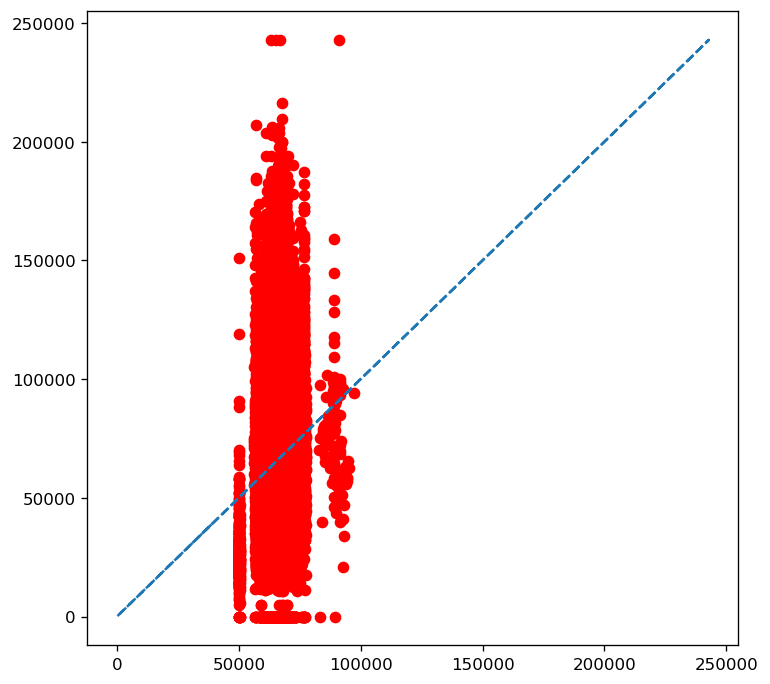

In [162]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)

ax.scatter(Y_hat,Y,marker='o',color='red')
ax.plot(Y,Y,ls='--')
plt.show()

In [163]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, Y_hat)))

Root Mean Squared Error: 30136.28161154002


In [164]:
print('R^2: ',metrics.r2_score(Y, Y_hat))

R^2:  0.020546067714339755


# Ejercicio

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
X = df[['Lat', 'Lon', 'Zip_Code']]
y = df['Mean']
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [167]:
y_pred = regressor.predict(X)

In [168]:
regressor.coef_, regressor.intercept_
# (array([ 6.55490348e+02, -5.75918372e+02, -2.94216316e-01]), 4152.027883761009)

(array([ 6.55490348e+02, -5.75918372e+02, -2.94216316e-01]), 4152.027883761009)

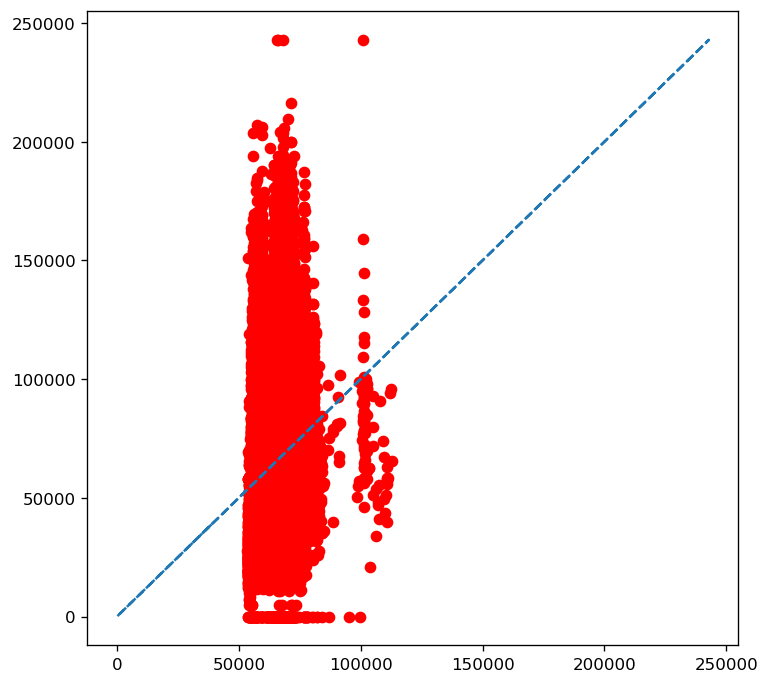

In [169]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)

ax.scatter(y_pred,y,marker='o',color='red')
ax.plot(y,y,ls='--')
plt.show()

In [170]:
from sklearn import metrics

In [171]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
# Root Mean Squared Error: 29957.858952859144

Root Mean Squared Error: 29957.858952859144


In [172]:
print('R^2: ',metrics.r2_score(y, y_pred))
# R^2:  0.03210950150675185

R^2:  0.03210950150675185
